In [1]:
!pip install shioaji
import numpy as np
import pandas as pd
import requests
import shioaji as sj
import datetime
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os
from dotenv import load_dotenv
# 加載 .env 文件中的環境變數
load_dotenv()

# 建立API物件，simulation=True是代表測試帳號
api = sj.Shioaji(simulation=True)

shioaji_secret = os.getenv("SHIOAJI_SECRETKEY", None)
shioaji_apikey = os.getenv("SHIOAJI_APIKEY", None)


# 登入你的key
# accounts = api.login("YOUR_API_KEY", "YOUR_SECRET_KEY")
accounts = api.login(shioaji_apikey, shioaji_secret)



#要下單的話要匯入憑證
# api.activate_ca(
#     ca_path="/c/your/ca/path/Sinopac.pfx",
#     ca_passwd="YOUR_CA_PASSWORD",
#     person_id="Person of this Ca",
# )

2024-07-07 14:53:07.723 | WARNING  | importlib._bootstrap:_call_with_frames_removed:241 - Optional: pip install shioaji[speed] for better performance.


Response Code: 0 | Event Code: 0 | Info: host '210.59.255.161:80', hostname '210.59.255.161:80' IP 210.59.255.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total connection attempt 1 of 1) | Event: Session up


In [5]:
date_to_query = datetime.date(2024,7,5)
# 將日期轉換為字符串格式
date_str = date_to_query.strftime('%Y-%m-%d')

scanners = api.scanners(
    scanner_type=sj.constant.ScannerType.AmountRank,
    count=20,
    date=date_str
)
df = pd.DataFrame(s.__dict__ for s in scanners)
df.ts = pd.to_datetime(df.ts)
df

2024-07-05


,date,code,name,ts,open,high,low,close,price_range,tick_type,...,volume_ratio,buy_price,buy_volume,sell_price,sell_volume,bid_orders,bid_volumes,ask_orders,ask_volumes,rank_value
0,2024-07-05,2330,台積電,2024-07-05 14:30:00,1005.0,1010.0,1000.0,1005.00,10.0,1,...,0.48,1000.00,1338,1005.0,734,4402,354842,2057,169152,2.008275e+10
1,2024-07-05,1513,中興電,2024-07-05 14:30:00,203.5,209.5,197.0,203.00,12.5,2,...,1.02,203.00,30,203.5,181,8840,335482,7003,201604,1.177326e+10
2,2024-07-05,2363,矽統,2024-07-05 14:30:00,63.5,65.2,61.6,63.90,3.6,1,...,4.11,63.80,72,63.9,218,14851,3062297,13664,91553,9.416811e+09
3,2024-07-05,2317,鴻海,2024-07-05 14:30:00,214.0,215.5,212.5,214.50,3.0,1,...,0.39,214.00,153,214.5,725,5945,290699,3874,246818,9.217729e+09
4,2024-07-05,2454,聯發科,2024-07-05 14:30:00,1380.0,1385.0,1335.0,1350.00,50.0,2,...,0.84,1350.00,132,1355.0,26,838,14009,1710,34921,8.652793e+09
5,2024-07-05,2486,一詮,2024-07-05 14:30:00,138.0,151.5,138.0,143.50,13.5,1,...,2.05,143.00,105,143.5,3,6627,88740,4738,55987,7.217304e+09
6,2024-07-05,1785,光洋科,2024-07-05 14:30:00,68.9,75.3,68.1,75.30,7.2,1,...,0.87,75.30,32002,0.0,0,12374,100091,9348,76799,7.092870e+09
7,2024-07-05,3661,世芯-KY,2024-07-05 14:30:00,2615.0,2625.0,2510.0,2525.00,115.0,1,...,0.95,2520.00,16,2525.0,5,591,5036,1112,12790,7.058943e+09
8,2024-07-05,3450,聯鈞,2024-07-05 14:30:00,142.0,149.0,137.5,143.50,11.5,1,...,0.60,143.00,42,143.5,126,6855,92070,5690,79530,6.678568e+09
9,2024-07-05,1519,華城,2024-07-05 14:30:00,1015.0,1030.0,930.0,936.00,100.0,2,...,4.59,936.00,11,937.0,3,1852,116510,1967,20448,6.616799e+09


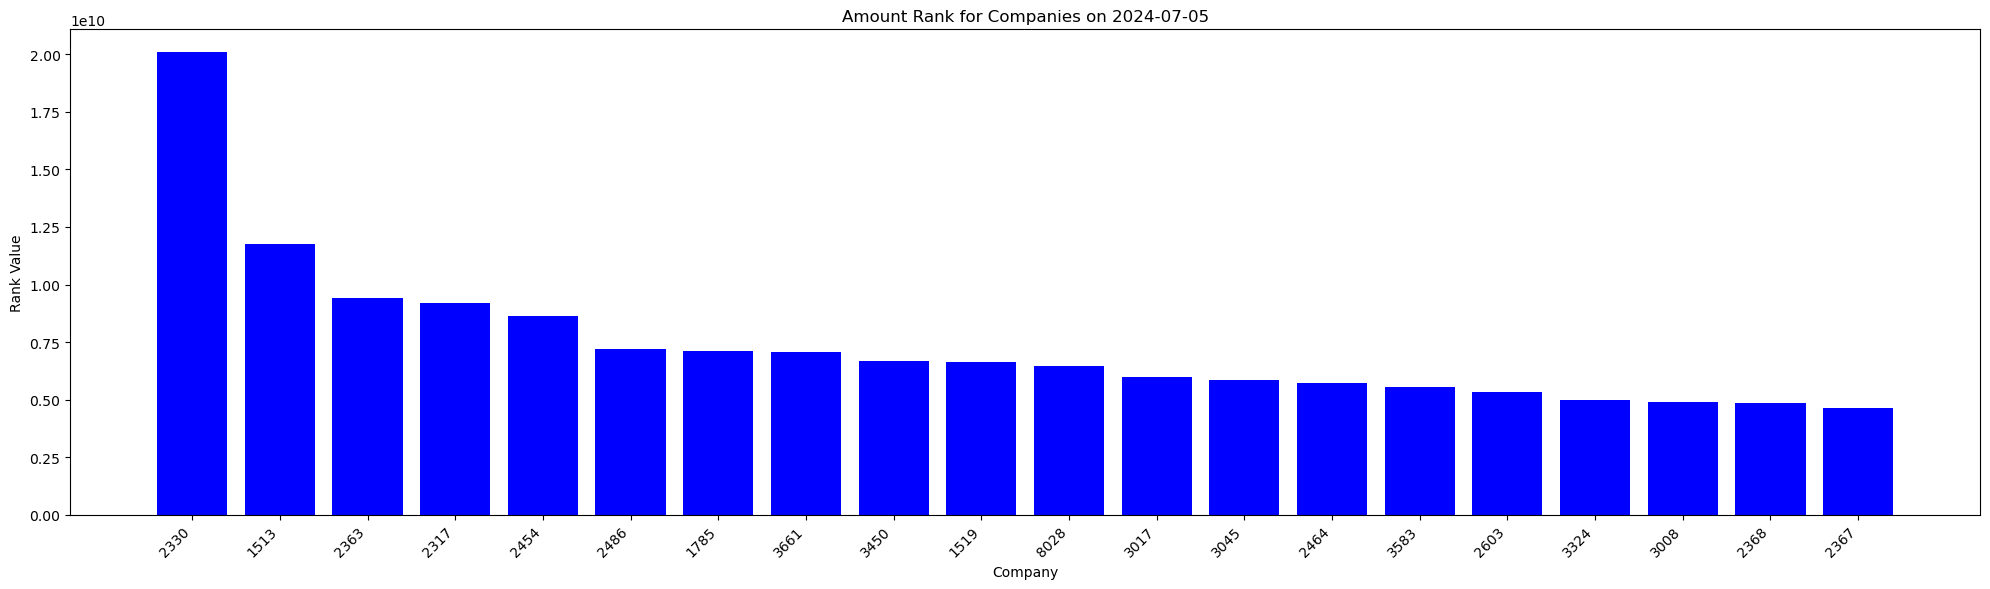

In [6]:
# 設置圖表大小
plt.figure(figsize=(20, 6))

# 提取 DataFrame 中的數據
names = df['code']
rank_values = df['rank_value']

# 繪製長條圖
plt.bar(names, rank_values, color='blue')

# 添加標籤和標題
plt.xlabel('Company')
plt.ylabel('Rank Value')
plt.title('Amount Rank for Companies on {}'.format(date_str))

# 自動調整 X 軸標籤
plt.xticks(rotation=45, ha='right')

# 顯示圖表
plt.tight_layout()
plt.show()


In [7]:
plt.close()
# 設置日期範圍
start_date = datetime.date(2024, 1, 1)
end_date = datetime.date(2024, 3, 22)
# 生成日期範圍
dates = [start_date + datetime.timedelta(days=x) for x in range((end_date - start_date).days + 1)]

# 創建動畫函數
def animate(date):
    date_str = date.strftime('%Y-%m-%d')
    scanners = api.scanners(
        scanner_type=sj.constant.ScannerType.AmountRank,
        count=20,
        date=date_str
    )
    df = pd.DataFrame(s.__dict__ for s in scanners)
    df.ts = pd.to_datetime(df.ts)
    
    plt.figure(figsize=(10, 6))
    plt.bar(df['code'], df['rank_value'], color='blue')
    plt.xlabel('company')
    plt.ylabel('amout value')
    plt.title('Amount Rank ({})'.format(date_str))
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    

# 關閉之前的圖表
plt.close()    
# 創建動畫
ani = animation.FuncAnimation(plt.figure(), animate, frames=dates, interval=100)

# 顯示動畫

plt.show()

<Figure size 640x480 with 0 Axes>